# Essential libraries importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import sklearn

# Data acquisition

Target files are the ones about weeks 1 to 9 of 2024

In [ ]:
from google.colab import drive
from pathlib import Path

drive_mount_path = "/content/drive"

if not Path(drive_mount_path).exists():
  drive.mount(drive_mount_path)

Mounted at /content/drive


In [ ]:
from google.colab import userdata

data_path = userdata.get('data_path')

# Load data

In [ ]:
%ls "{data_path}"

trafic_capteurs_2024_W01_20240101_20240108.txt
trafic_capteurs_2024_W02_20240108_20240115.txt
trafic_capteurs_2024_W03_20240115_20240122.txt
trafic_capteurs_2024_W04_20240122_20240129.txt
trafic_capteurs_2024_W05_20240129_20240201.txt
trafic_capteurs_2024_W05_20240201_20240205.txt
trafic_capteurs_2024_W06_20240205_20240212.txt
trafic_capteurs_2024_W07_20240212_20240219.txt
trafic_capteurs_2024_W08_20240219_20240226.txt
trafic_capteurs_2024_W09_20240226_20240301.txt


Let's load week 1 data

In [ ]:
w1_df = pd.read_csv(f"{data_path}/trafic_capteurs_2024_W01_20240101_20240108.txt", sep=";")

print(w1_df.shape, "\n")

print(list(w1_df.columns), "\n")

w1_df.head()

(555240, 12) 

['iu_ac', 'libelle', 'iu_nd_amont', 'libelle_nd_amont', 'iu_nd_aval', 'libelle_nd_aval', 't_1h', 'q', 'k', 'etat_trafic', 'etat_barre', 'dessin'] 



,iu_ac,libelle,iu_nd_amont,libelle_nd_amont,iu_nd_aval,libelle_nd_aval,t_1h,q,k,etat_trafic,etat_barre,dessin
0,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2024-01-01 01:00:00,151.0,0.94556,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
1,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2024-01-01 02:00:00,182.0,1.20833,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
2,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2024-01-01 03:00:00,183.0,1.54611,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
3,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2024-01-01 04:00:00,158.0,0.84889,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
4,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2024-01-01 05:00:00,115.0,0.71278,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."


Here is the data description

- *iu_ac* : Unique identifier for the traffic data arc
- *libelle* : Label of the track or track section modeled by the arc
- *iu_nd_amont* : Unique identifier of the upstream node of the arc
- *libelle_nd_amont* : Label of the upstream node of the arc
- *iu_nd_aval* : Identifier of the downstream node of the arc
- *libelle_nd_aval* : Label of the downstream node of the arc
- *t_1h* : Time stamp (end of processing period) in ISO format: YYYY-MM-DD HH:MM:SS
- *q* : Traffic flow (number of vehicles counted during the hour)
- *k* : Occupancy rate (as a percentage of time the measuring station is occupied by vehicles per hour). Based on this value, we can qualify traffic state at the measuring point
  + $0\% \le k \lt 15\% \rightarrow$ fluid  
  + $15\% \le k \lt 30\% \rightarrow$ presaturated  
  + $30\%  \le k \lt 50\% \rightarrow$ saturated  
  + $50\%  \le k \rightarrow$ blocked  
- *etat_trafic* : Traffic state qualification
  + 0: unknown
  + 1: fluid
  + 2: presaturated
  + 3: saturated
  + 4: blocked
- *etat_barre* : Open or closed state (crossed out, unknown, or invalid) for
arc circulation
  + 0: unknown
  + 1: open
  + 2: closed
  + 3: invalid
- *dessin* : Schematic drawing of the arc for the corresponding identifier "iu_ac" and timestamp "t_1h"

# Data overview and check

In [ ]:
w1_df.dtypes

,0
iu_ac,int64
libelle,object
iu_nd_amont,int64
libelle_nd_amont,object
iu_nd_aval,int64
libelle_nd_aval,object
t_1h,object
q,float64
k,float64
etat_trafic,int64


In [ ]:
w1_df["t_1h"] = pd.to_datetime(w1_df["t_1h"])

w1_df["t_1h"].head()

,t_1h
0,2024-01-01 01:00:00
1,2024-01-01 02:00:00
2,2024-01-01 03:00:00
3,2024-01-01 04:00:00
4,2024-01-01 05:00:00


In [ ]:
w1_df.describe()

,iu_ac,iu_nd_amont,iu_nd_aval,t_1h,q,k,etat_trafic,etat_barre
count,555240.000000,555240.000000,555240.000000,555240,260251.000000,265756.000000,555240.000000,555240.000000
mean,3665.745537,1817.121331,1814.705295,2024-01-04 12:29:59.999999744,623.583641,5.926950,0.534529,2.768945
min,1.000000,0.000000,0.000000,2024-01-01 01:00:00,0.000000,0.000000,0.000000,1.000000
25%,1248.000000,578.000000,579.000000,2024-01-02 18:45:00,134.000000,1.350000,0.000000,3.000000
50%,4542.000000,2315.000000,2315.000000,2024-01-04 12:30:00,289.000000,3.302780,0.000000,3.000000
75%,5589.000000,2864.000000,2861.000000,2024-01-06 06:15:00,564.000000,7.148890,1.000000,3.000000
max,7231.000000,3740.000000,3740.000000,2024-01-08 00:00:00,7914.000000,96.118330,4.000000,3.000000
std,2332.511268,1202.643205,1199.293495,NaN,1078.200166,7.937559,0.626988,0.626147


In [ ]:
# Basic statistics
print(f"Time range: <{w1_df['t_1h'].min()}> to <{w1_df['t_1h'].max()}>", "\n")
print(f"Number of unique arcs: {w1_df['iu_ac'].nunique()}", "\n")

Time range: <2024-01-01 01:00:00> to <2024-01-08 00:00:00> 

Number of unique arcs: 3305 



In [ ]:
# Record distribution per arc
w1_df['iu_ac'].value_counts().describe()

,count
count,3305.0
mean,168.0
std,0.0
min,168.0
25%,168.0
50%,168.0
75%,168.0
max,168.0


In [ ]:
traffic_state_label = ["Unknown", "Fluid", "Presaturated", "Saturated", "Blocked"]

<Axes: ylabel='count'>

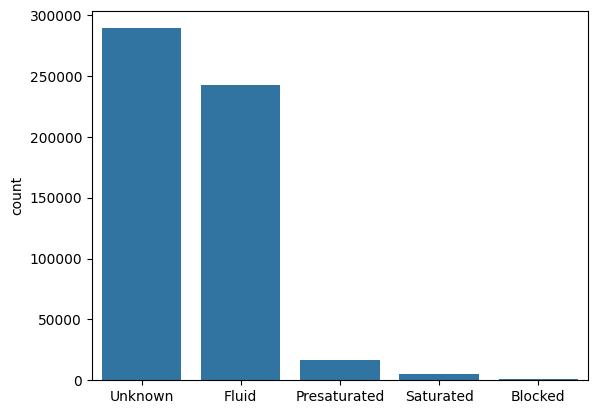

In [ ]:
# Traffic state distribution
sns.barplot(x=traffic_state_label, y=w1_df['etat_trafic'].value_counts().sort_index())

In [ ]:
w1_df[w1_df["etat_trafic"] == 0].describe()

,iu_ac,iu_nd_amont,iu_nd_aval,t_1h,q,k,etat_trafic,etat_barre
count,289484.000000,289484.000000,289484.000000,289484,66209.000000,0.0,289484.0,289484.000000
mean,3887.702605,1954.362231,1919.563530,2024-01-04 12:31:17.562835712,307.744128,NaN,0.0,2.815226
min,1.000000,0.000000,0.000000,2024-01-01 01:00:00,0.000000,NaN,0.0,1.000000
25%,1414.000000,647.000000,635.000000,2024-01-02 18:00:00,114.000000,NaN,0.0,3.000000
50%,4671.000000,2389.000000,2378.000000,2024-01-04 12:00:00,237.000000,NaN,0.0,3.000000
75%,5875.000000,2959.000000,2933.000000,2024-01-06 07:00:00,415.000000,NaN,0.0,3.000000
max,7231.000000,3740.000000,3740.000000,2024-01-08 00:00:00,5334.950000,NaN,0.0,3.000000
std,2359.153275,1213.169468,1204.969576,NaN,286.324182,NaN,0.0,0.561798


We will handle null values later

# Temporal patterns

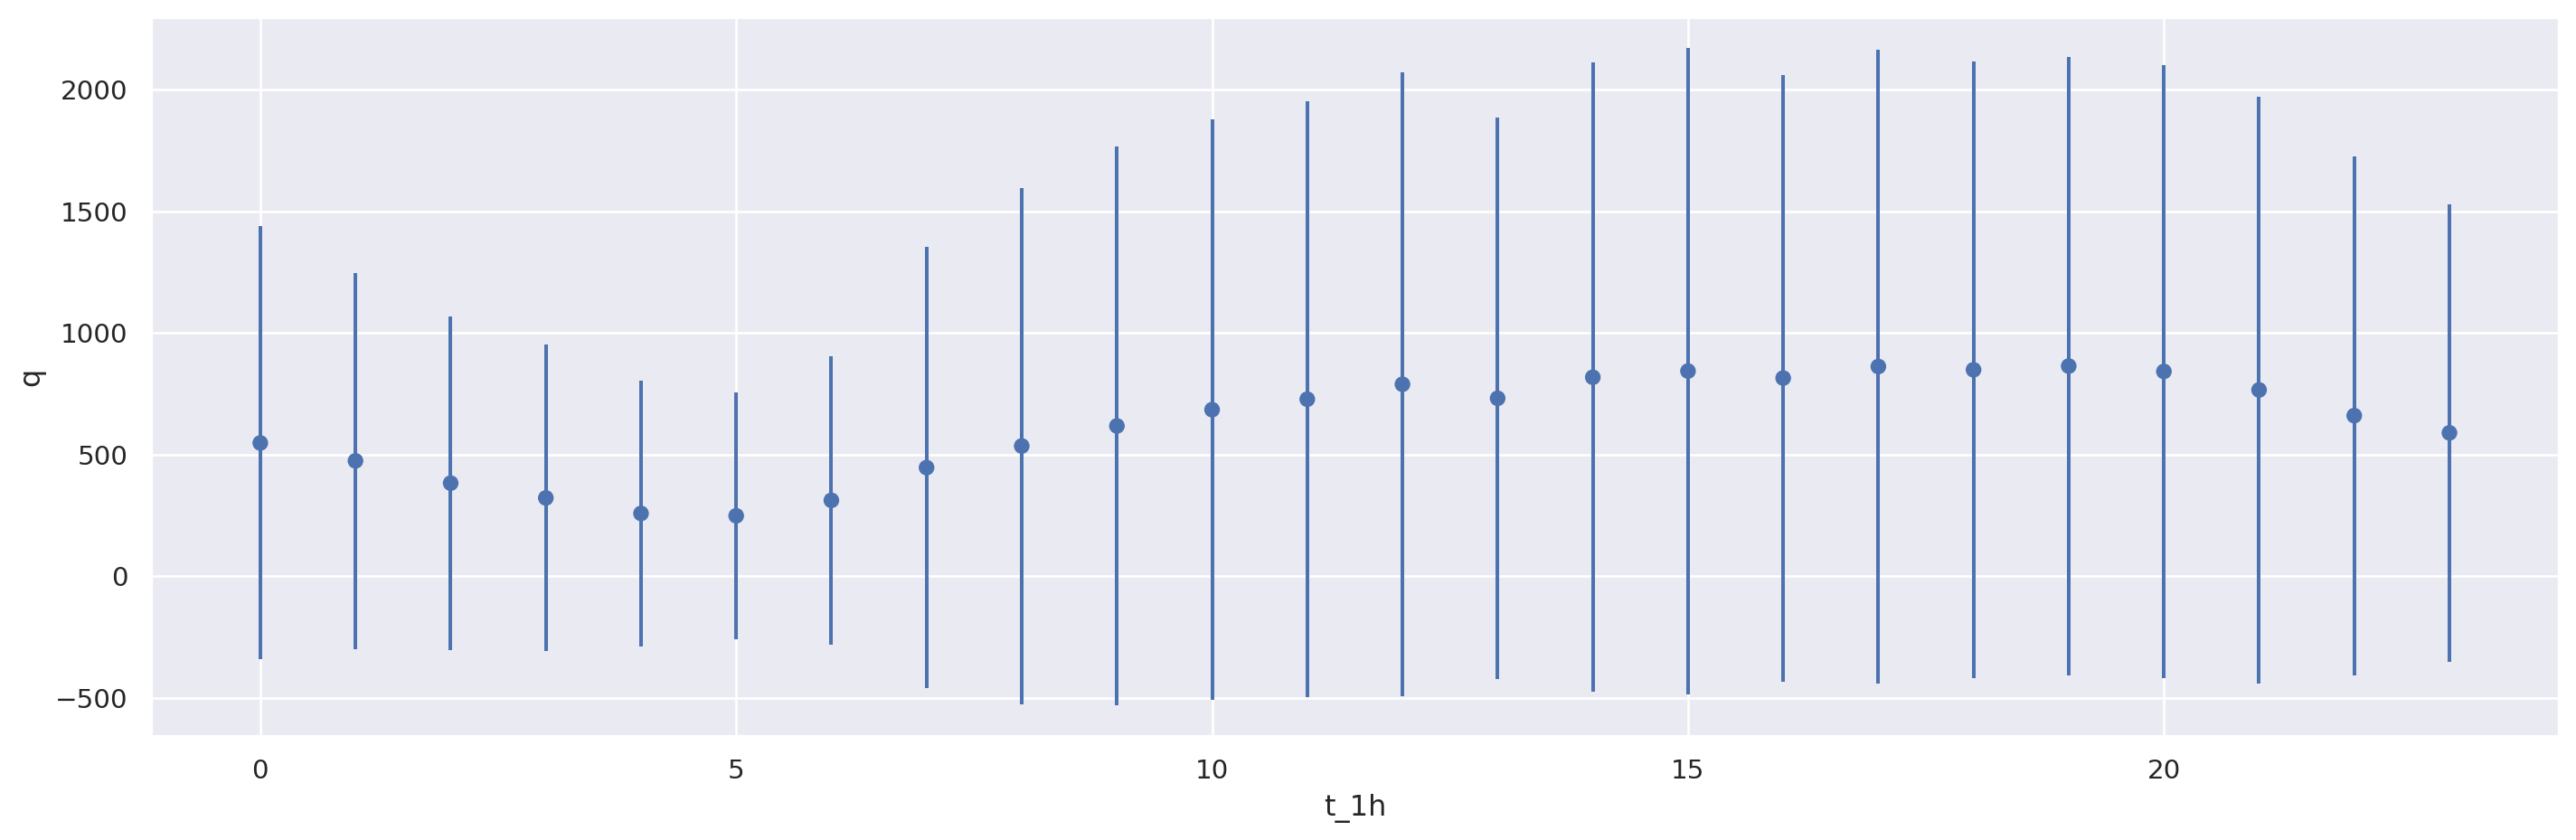

In [ ]:
# Number of vehicles by time of day
p = so.Plot(w1_df, x=w1_df["t_1h"].dt.hour, y="q")
p = p.add(so.Dot(), so.Agg()) # mean
p = p.add(so.Range(), so.Est(errorbar="sd")) # min - max
p = p.layout(size=(15, 5))
p

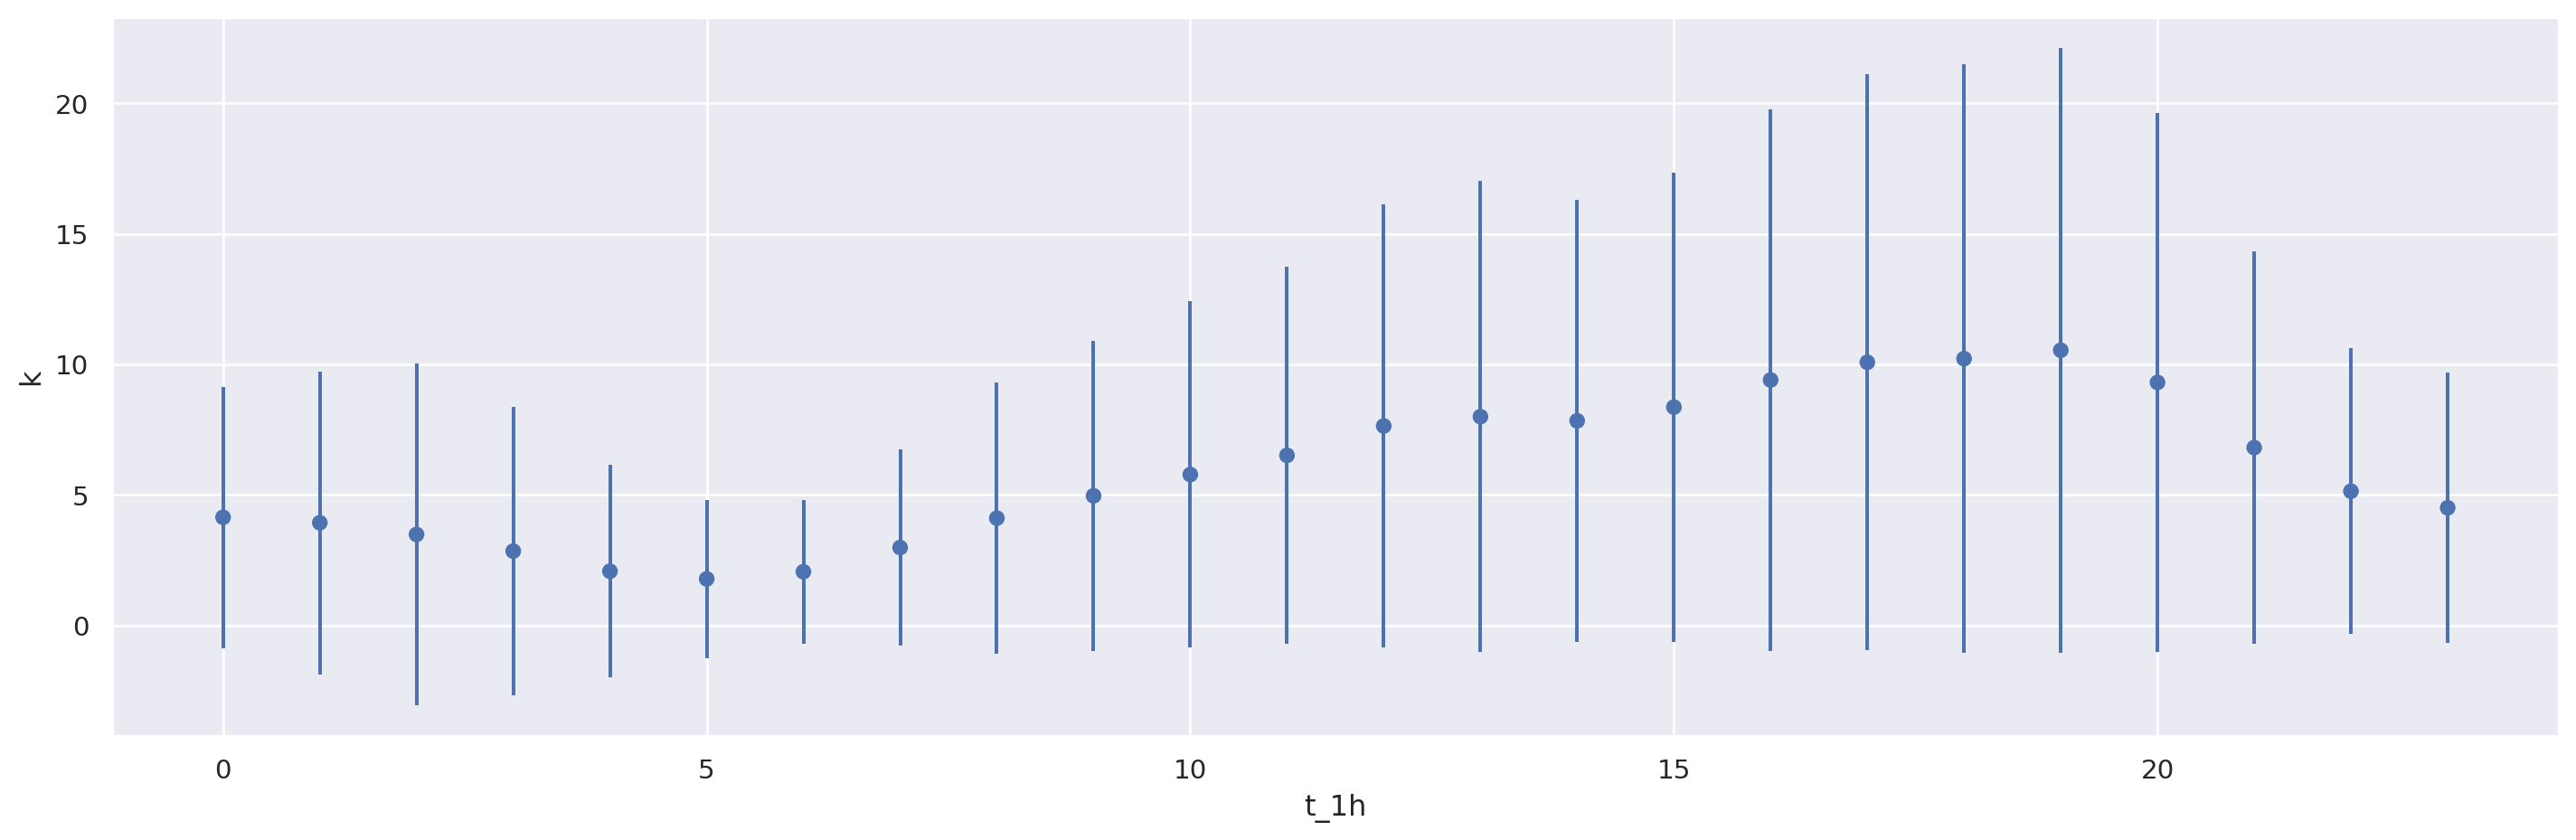

In [ ]:
# Occupancy rate by time of day
p = so.Plot(w1_df, x=w1_df["t_1h"].dt.hour, y="k")
p = p.add(so.Dot(), so.Agg()) # mean
p = p.add(so.Range(), so.Est(errorbar="sd")) # min - max
p = p.layout(size=(15, 5))
p

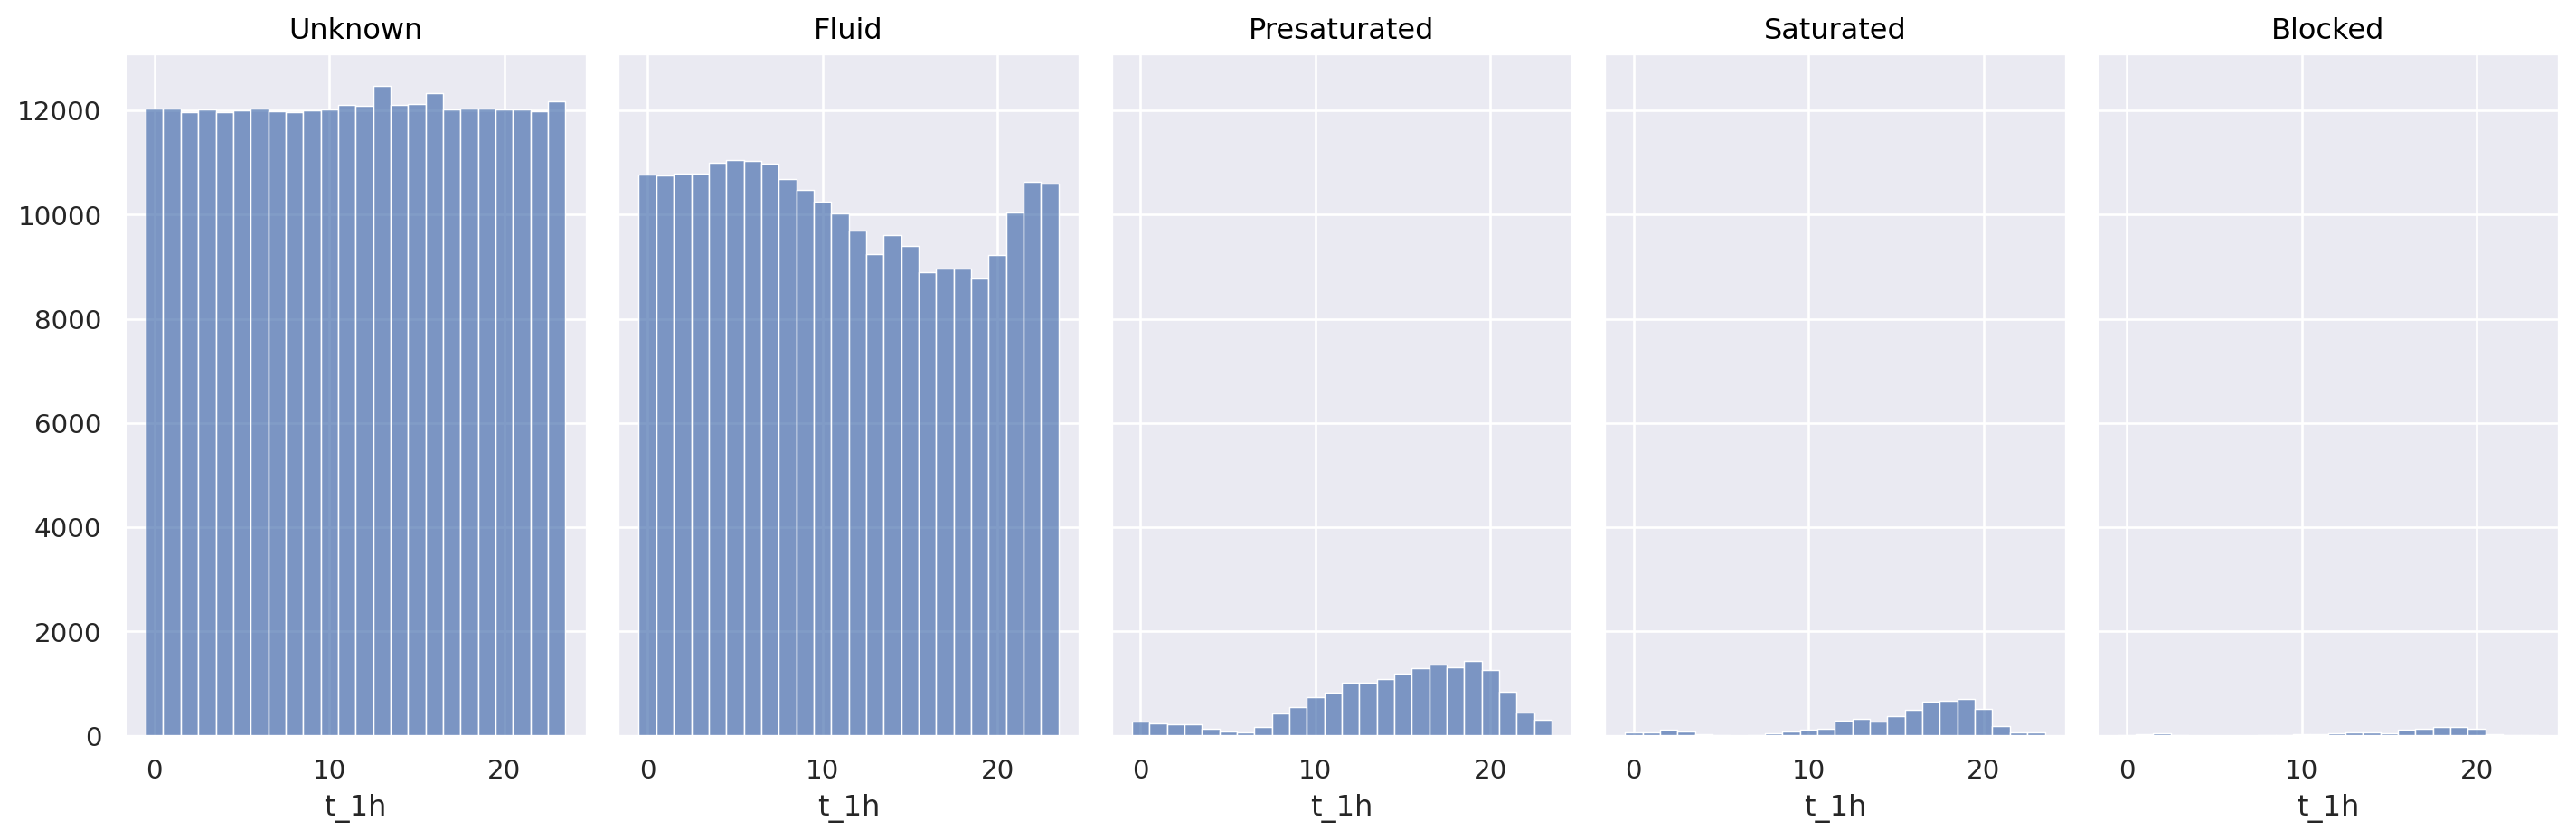

In [ ]:
# Traffic state distribution by time of day
p = so.Plot(w1_df, x=w1_df["t_1h"].dt.hour)
p = p.facet("etat_trafic").label(title=lambda x: traffic_state_label[int(x)])
p = p.add(so.Bars(), so.Count())
p = p.layout(size=(15, 5))
p

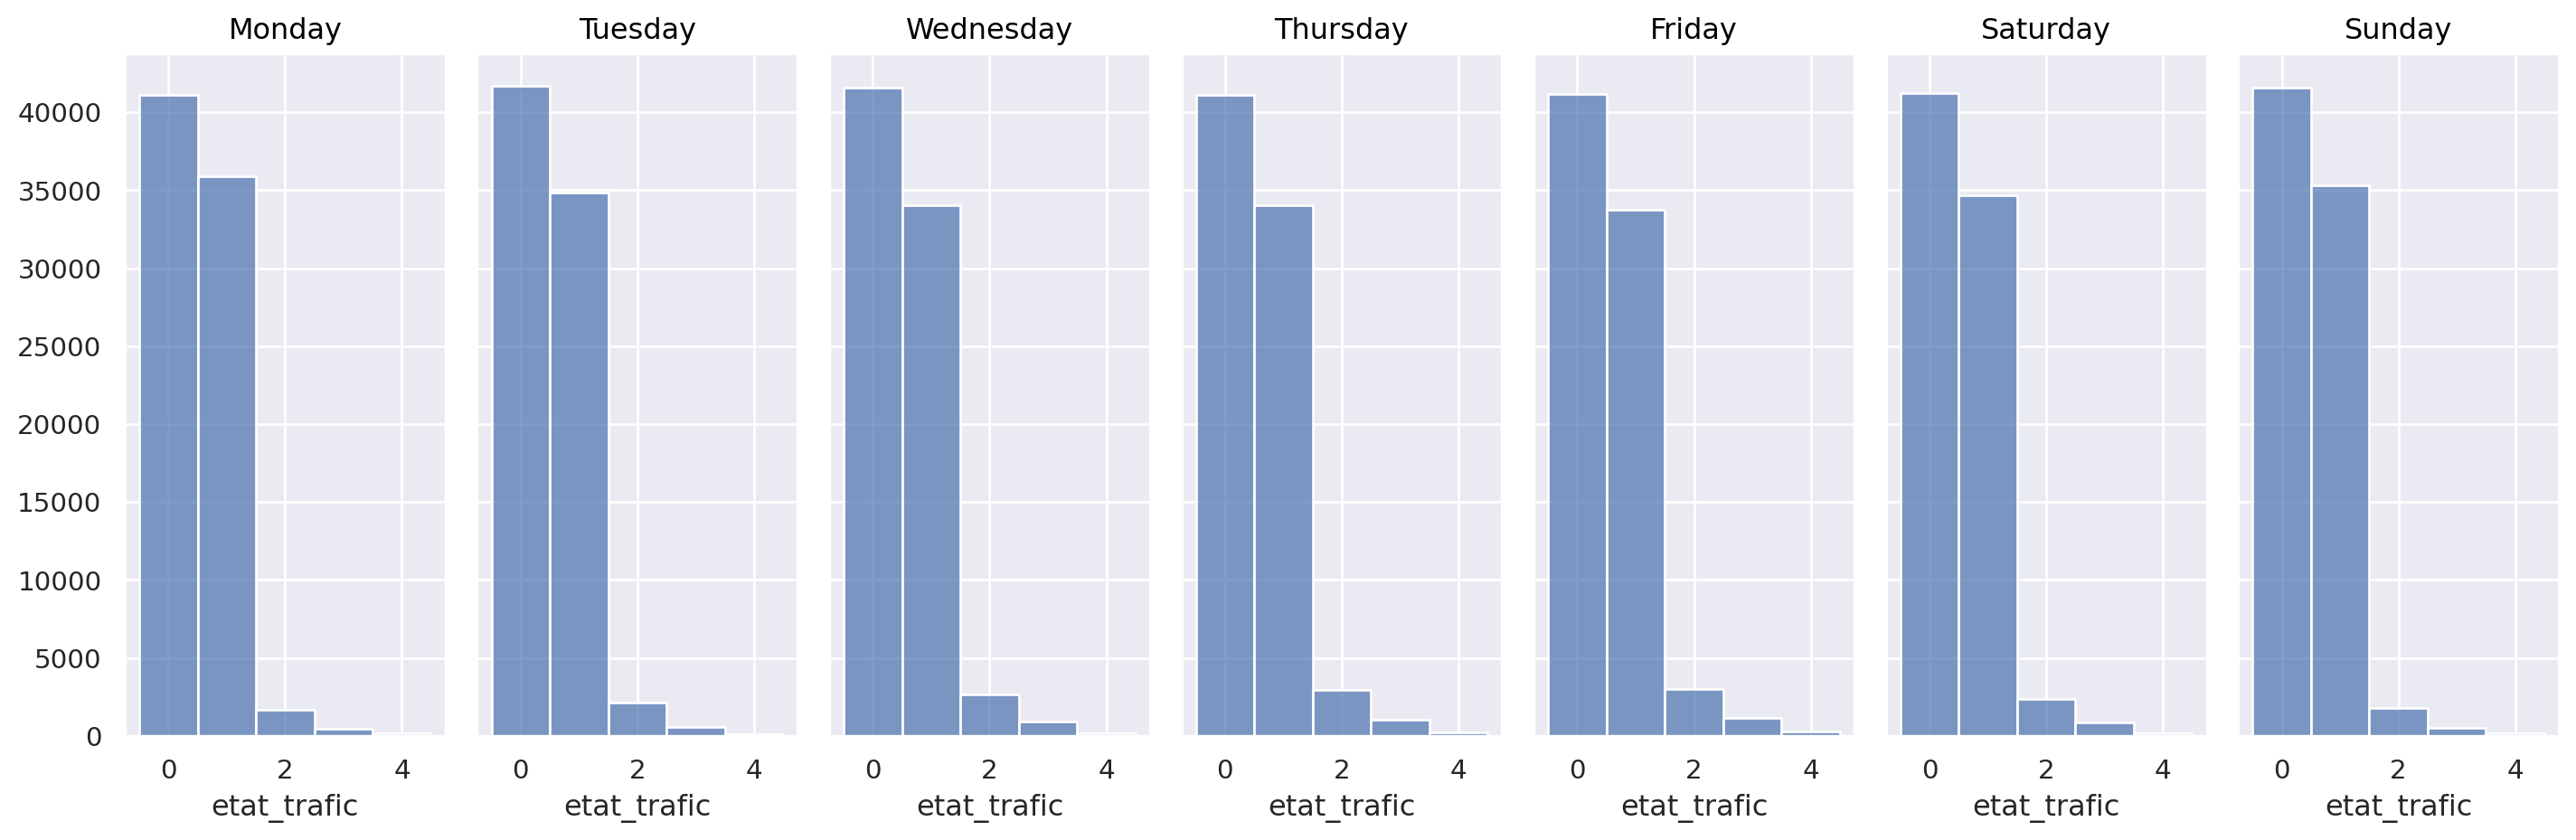

In [ ]:
# Day-based comparison
p = so.Plot(w1_df, x="etat_trafic").facet(w1_df["t_1h"].dt.day_name()).add(so.Bars(), so.Count())
p.layout(size=(15, 5))

No significant difference can be observed accross days

# Null handling

In [ ]:
# Missing values
w1_df.isna().sum()

,0
iu_ac,0
libelle,0
iu_nd_amont,0
libelle_nd_amont,0
iu_nd_aval,0
libelle_nd_aval,0
t_1h,0
q,294989
k,289484
etat_trafic,0
